#  Modelling:



**- Model 1: KFold + Random Forest Regressor**

**- Model 2: train_test_split + PCA + Random Forest Regressor**



In [1]:
# Basics
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot # plot with monokai theme
jtplot.style(theme='monokai')

# Modelling
from sklearn import neighbors
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import  r2_score
from sklearn.model_selection import KFold

### 1) Load processed data for modelling

In [2]:
# Windfarm's data: 1 turbine
df = pd.read_csv('Turb11_Model.csv')
df.shape

(250124, 51)

In [3]:
# Target  
P_3h = pd.read_csv('P_3h_Turb11.csv')
P_3h.shape

(250124, 2)

In [4]:
# Make a copy from our target's dataframe
P_3h_model2 = P_3h.copy()

In [5]:
# Delete datetime and 'Unnamed' cols
del df['Unnamed: 0']
del P_3h['datetime']

In [6]:
# Convert P_3h['P_3h'] to float
P_3h['P_3h'] = P_3h['P_3h'].astype(float)

In [7]:
# Add P_3h['P_3h'] to our df
df['P_3h'] = P_3h['P_3h']

In [8]:
# Dataframe for modelling: 1 turbine
pd.set_option('display.max_columns', None)
df.head()

,pr_3h,Hum,Vis_hor,pr_st,W_blast,Rain_1h,Rain_3h,Ba_avg,Q_avg,Q_min,Q_max,Q_std,Dst_avg,Gb1t_avg,Git_avg,Gost_avg,Yt_avg,Ws1_std,Ws2_std,Ws_avg,Ws_min,Wa_avg,Ot_avg,Rs_avg,Rbt_avg,Yt_avg_1h,Yt_avg_3h,Rs_avg_1h,Rs_avg_6h,Gb1t_avg_3h,Gost_avg_6h,Wa_avg_1h,Wa_avg_3h,Ba_avg_1h,Ba_avg_3h,Ba_avg_6h,TI,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sept,Oct,Nov,Dec,P_3h
0,1.830561,0.426620,-0.344222,0.188511,-0.488831,-0.249369,-0.308256,-0.423531,0.121381,0.217100,0.182151,0.278744,0.574858,-0.100872,0.632286,0.376578,-1.737731,-0.496315,-0.409871,-0.577004,-0.520623,0.673374,-1.257992,-0.316649,-0.365961,-0.596207,-0.580934,-0.100055,0.719170,0.368887,0.386968,0.567983,0.564711,-0.462081,-0.496148,-0.531200,-0.102166,-1.415811,3.186269,-0.289833,-0.305137,-0.299648,-0.302019,-0.294941,-0.303859,-0.304745,-0.298823,-0.304847,-0.294243,-0.305692,340.419474
1,1.849694,0.430229,-0.362820,0.202214,-0.465161,-0.249369,-0.308256,-0.425287,0.621059,0.904185,0.824877,0.142120,0.196272,-0.193566,0.493536,0.314220,-1.501557,-0.403675,-0.261742,-0.585143,-0.603902,0.652651,-1.264511,-0.325853,-0.420154,-0.697260,-0.661860,-0.160386,0.694337,0.326433,0.391126,0.602587,0.570227,-0.459052,-0.494972,-0.530560,-0.013097,-1.415811,3.186269,-0.289833,-0.305137,-0.299648,-0.302019,-0.294941,-0.303859,-0.304745,-0.298823,-0.304847,-0.294243,-0.305692,316.015263
2,1.868826,0.433838,-0.381418,0.215918,-0.441491,-0.249369,-0.308256,-0.401144,0.922654,0.203509,0.464584,0.052724,0.082697,-0.222935,0.440073,0.275745,-0.706023,0.244807,-0.039549,-0.784538,-1.353417,0.802026,-1.257992,-0.340580,-0.435103,-0.754790,-0.705931,-0.230230,0.669116,0.278815,0.395947,0.661274,0.586462,-0.452402,-0.492391,-0.529155,0.506538,-1.415811,3.186269,-0.289833,-0.305137,-0.299648,-0.302019,-0.294941,-0.303859,-0.304745,-0.298823,-0.304847,-0.294243,-0.305692,288.485788
3,1.887959,0.437447,-0.400016,0.229621,-0.417821,-0.249369,-0.308256,0.416225,1.594215,-1.321668,3.301893,5.844912,0.188911,-0.338573,0.392974,0.231962,-0.424790,0.870128,-0.582689,-1.256576,-1.786469,0.735018,-1.239737,-0.933321,-0.450053,-0.805316,-0.738887,-0.373177,0.627858,0.226530,0.393923,0.706061,0.599664,-0.323147,-0.442230,-0.501848,1.029438,-1.415811,3.186269,-0.289833,-0.305137,-0.299648,-0.302019,-0.294941,-0.303859,-0.304745,-0.298823,-0.304847,-0.294243,-0.305692,263.388947
4,1.907092,0.441055,-0.418614,0.243324,-0.394151,-0.249369,-0.308256,1.573359,-0.913117,-0.053959,-1.030786,-0.900271,0.162620,-0.592793,0.246587,0.161644,-0.230568,-0.635276,-0.681441,-1.374586,-1.353417,0.660225,-1.225395,-1.842682,-0.498639,-0.843336,-0.718607,-0.619123,0.557204,0.158803,0.387078,0.719237,0.609316,-0.020390,-0.324711,-0.437872,0.518113,-1.415811,3.186269,-0.289833,-0.305137,-0.299648,-0.302019,-0.294941,-0.303859,-0.304745,-0.298823,-0.304847,-0.294243,-0.305692,234.953157


### 2) Divide data in X,Y 

In [9]:
# assign values of X and Y
X= np.array(df.iloc[:,:-1])
y= np.array(df.iloc[:,-1])

In [10]:
X.shape

(250124, 50)

In [11]:
y.shape

(250124,)

### 3) Models
    - 3.1 Model 2: KFold + Random Forest Regressor
    - 3.2 Model 1: PCA + Random Forest Regressor

**3.1 Model 1: KFold + Random Forest Regressor**

In [12]:
%%time
kf = KFold(n_splits=5) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
print(kf) 
KFold(n_splits=5, random_state=None, shuffle=False)

rfr = RandomForestRegressor(n_estimators = 100, random_state = 0, verbose=3, n_jobs=-1, max_depth= 50)
for train_index, test_index in kf.split(X):
    print ("TRAIN:",train_index,"TEST:",test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test= y[train_index], y[test_index]
    rfr.fit(X_train, y_train)
    #yhat= rfr.predict(X_test)
    r2_ajustada = 1 - (1-rfr.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
    print(r2_ajustada)

KFold(n_splits=5, random_state=None, shuffle=False)
TRAIN: [ 50025  50026  50027 ... 250121 250122 250123] TEST: [    0     1     2 ... 50022 50023 50024]
building tree 1 of 100building tree 2 of 100
building tree 3 of 100building tree 4 of 100
building tree 5 of 100


building tree 6 of 100building tree 7 of 100building tree 8 of 100


building tree 9 of 100building tree 10 of 100
building tree 11 of 100

building tree 12 of 100


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100


[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   13.6s


building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.1min finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.2s finished


0.9634726151873084
TRAIN: [     0      1      2 ... 250121 250122 250123] TEST: [ 50025  50026  50027 ... 100047 100048 100049]


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 100building tree 2 of 100
building tree 3 of 100
building tree 4 of 100building tree 5 of 100

building tree 6 of 100
building tree 7 of 100

building tree 8 of 100building tree 9 of 100

building tree 10 of 100building tree 11 of 100

building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100


[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   13.4s


building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.0min finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.3s finished


0.9819854710967821
TRAIN: [     0      1      2 ... 250121 250122 250123] TEST: [100050 100051 100052 ... 150072 150073 150074]


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 100building tree 2 of 100
building tree 3 of 100building tree 4 of 100

building tree 5 of 100

building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100building tree 10 of 100
building tree 11 of 100
building tree 12 of 100

building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100

[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   14.2s



building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 6

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.0min finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.3s finished


0.9858909400816566
TRAIN: [     0      1      2 ... 250121 250122 250123] TEST: [150075 150076 150077 ... 200097 200098 200099]


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 100building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100

building tree 7 of 100building tree 8 of 100

building tree 9 of 100building tree 10 of 100
building tree 11 of 100
building tree 12 of 100

building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100building tree 17 of 100

building tree 18 of 100
building tree 19 of 100


[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   14.7s


building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100building tree 51 of 100

building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.0min finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.3s finished


0.9863842664313318
TRAIN: [     0      1      2 ... 200097 200098 200099] TEST: [200100 200101 200102 ... 250121 250122 250123]


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 100building tree 2 of 100
building tree 3 of 100
building tree 4 of 100

building tree 5 of 100
building tree 6 of 100
building tree 7 of 100building tree 8 of 100building tree 9 of 100

building tree 10 of 100
building tree 11 of 100
building tree 12 of 100

building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100


[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   13.9s


building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.0min finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s


0.9783813389748327
CPU times: user 1h 38min, sys: 37.2 s, total: 1h 38min 37s
Wall time: 10min 2s


[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.3s finished


**3.2 Model 2: PCA + Random Forest Regressor**

In [13]:
# Division of training and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [14]:
# Apply PCA; 10 components/features
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

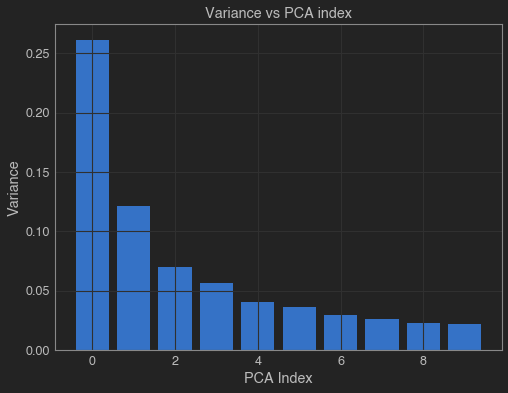

In [15]:
# Plot PCA Variance vs PCA index; relevance of PCA-created features
plt.figure(figsize=(8,6))
plt.bar(range(0,10), pca.explained_variance_ratio_)
plt.title('Variance vs PCA index')
plt.ylabel('Variance')
plt.xlabel('PCA Index')
plt.show()

In [16]:
%%time
# Random forest regressor: 100 trees
rfr_pca = RandomForestRegressor(n_estimators = 100, random_state = 0, verbose=3, n_jobs=-1)
rfr_pca.fit(X_train_pca, y_train)

scores = cross_val_score(rfr_pca, X_train_pca, y_train, cv = 10, scoring="r2")

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 100building tree 2 of 100

building tree 3 of 100
building tree 4 of 100building tree 5 of 100

building tree 6 of 100
building tree 7 of 100building tree 8 of 100
building tree 9 of 100

building tree 10 of 100
building tree 11 of 100building tree 12 of 100

building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100building tree 19 of 100

building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100


[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    4.0s


building tree 25 of 100building tree 26 of 100

building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100building tree 57 of 100

building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   36.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   34.8s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   38.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[P

CPU times: user 6min 46s, sys: 41.3 s, total: 7min 27s
Wall time: 6min 29s


[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.2s finished


### 4) Metrics
    - 4.1 Calculate yhat (predicted)
    - 4.2 Calculate r2 score
    - 4.3 Calculate MAE (mean absolute error)

**4.1 Calculate yhat (predicted)**

In [17]:
# Predicted values (y_hat)
yhat_pca = rfr_pca.predict(X_test_pca) # with PCA
yhat = rfr.predict(X_test) # with KFold

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.8s finished


**4.2 Calculate r2 scores**

In [34]:
# Print r2 score
print('R2 score_model 1:', r2_score(y_test,yhat), '(KFold + RFR)')
print('R2 score_model 2:', r2_score(y_test,yhat_pca), '(PCA + RFR)')

R2 score_model 1: 0.9946611511810791 (KFold + RFR)
R2 score_model 2: 0.9415430078577728 (PCA + RFR)


**4.3 Calculate MAE (mean absolute error)**

In [35]:
# Calculate absolute errors
errors_pca = abs(yhat_pca - y_test)
errors = abs(yhat - y_test)
# Print mean absolute error (MAE) - units: kW/3h
print('MAE_model 1:', round(np.mean(errors), 2), 'kW/3h')
print('MAE_model 2:', round(np.mean(errors_pca), 2), 'kW/3h')

MAE_model 1: 12.68 kW/3h
MAE_model 2: 62.91 kW/3h


### 5) True vs Predicted
    - 5.1 Create dataframe with True and Predicted values 
    - 5.2 Mean of positive P_3h values
    - 5.3 Scatter plot: true vs predicted

**5.1 Create dataframe with True and Predicted values**

In [20]:
df_solutions_pca = pd.DataFrame({'True (y_test)' : np.array(y_test), 'Predicted (y_hat)' : np.array(yhat_pca)})

In [21]:
df_solutions_pca.head()

,True (y_test),Predicted (y_hat)
0,487.925785,432.784284
1,142.260001,166.369648
2,-1.074211,-1.044005
3,182.606316,198.001016
4,133.589999,186.815184


In [22]:
df_solutions_kfold = pd.DataFrame({'True (y_test)' : np.array(y_test), 'Predicted (y_hat)' : np.array(yhat)})

In [23]:
df_solutions_kfold.head()

,True (y_test),Predicted (y_hat)
0,487.925785,480.584613
1,142.260001,152.588054
2,-1.074211,-1.069832
3,182.606316,183.673206
4,133.589999,139.190426


**5.2 Mean of positive P_3h values**

In [24]:
# Extract positive values to calculate the mean while the turbines are working
positive_values= df_solutions_pca[df_solutions_pca['True (y_test)'] > 0]

In [25]:
# Mean values of P_3h  
positive_values['True (y_test)'].mean()

418.09889669488615

**5.3 Scatter plots: true vs predicted**

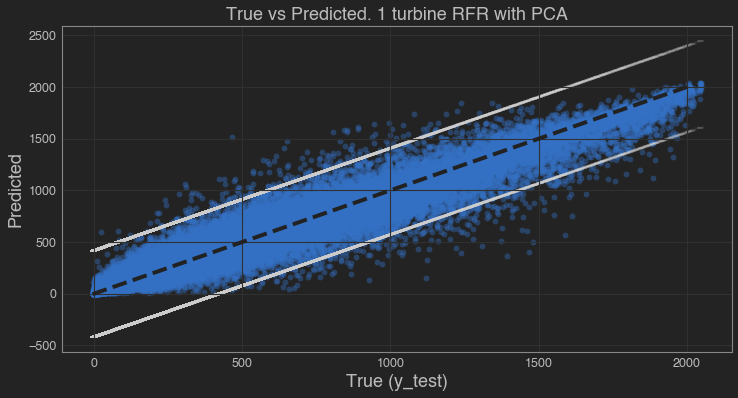

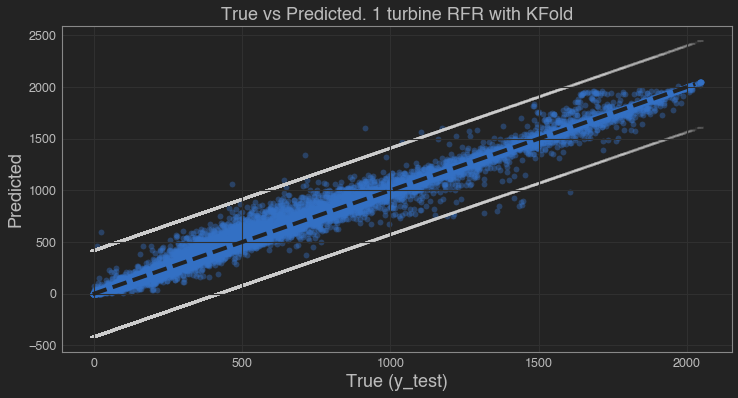

In [26]:
# Scatter plot of True vs Predicted; to visualize the fitting
list_yhats = [yhat_pca, yhat]
title_list = ['True vs Predicted. 1 turbine RFR with PCA', 'True vs Predicted. 1 turbine RFR with KFold']
list_x = [df_solutions_pca, df_solutions_kfold]
for i, j, k in zip (list_yhats, title_list, list_x):
    fig, ax = plt.subplots()
    ax.scatter(y_test, i, alpha= 0.4)
    x = k['True (y_test)']
    y = x*0.99
    ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
    plt.scatter(x, y - np.std(y),marker='_' , c='w', lw=0.040)
    plt.scatter(x, y + np.std(y),marker='_' , c='w', lw=0.040)
    plt.title(j, fontsize=18)
    plt.xlabel('True (y_test)', fontsize=18)
    plt.ylabel('Predicted', fontsize=18)
    fig.set_size_inches(12, 6)

### 6) Feature Importance

In [27]:
# Select all features; not the target! 
features = df.iloc[:,:-1]

feature_importance_list= []
# Make list of features
feature_list= features.columns
# Get numerical feature importances 
importances = list(rfr.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) 
for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first 
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Append to a list
feature_importance_list.append(feature_importances)
# Print out the feature and importances
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Rs_avg_1h            Importance: 0.67
Variable: Rs_avg_6h            Importance: 0.14
Variable: Ba_avg_1h            Importance: 0.09
Variable: Ba_avg_3h            Importance: 0.05
Variable: Gb1t_avg_3h          Importance: 0.03
Variable: Yt_avg_3h            Importance: 0.01
Variable: pr_3h                Importance: 0.0
Variable: Hum                  Importance: 0.0
Variable: Vis_hor              Importance: 0.0
Variable: pr_st                Importance: 0.0
Variable: W_blast              Importance: 0.0
Variable: Rain_1h              Importance: 0.0
Variable: Rain_3h              Importance: 0.0
Variable: Ba_avg               Importance: 0.0
Variable: Q_avg                Importance: 0.0
Variable: Q_min                Importance: 0.0
Variable: Q_max                Importance: 0.0
Variable: Q_std                Importance: 0.0
Variable: Dst_avg              Importance: 0.0
Variable: Gb1t_avg             Importance: 0.0
Variable: Git_avg              Importance: 0.0
Variabl

In [28]:
# Access variable name & percentage
list_import= []
for i in feature_importance_list:
    for j in i:
        for k in j:
            list_import.append(k)

In [29]:
# Function to convert list to dictionary
def Convert(lst):
    res_dct = {lst[i]: lst[i + 1] for i in range(0, len(lst), 2)}
    return res_dct

In [30]:
dictionary= Convert(list_import)

In [31]:
# Convert dictionary to df
df_importance_var = pd.DataFrame([[key, dictionary[key]] for key in dictionary.keys()], 
                                 columns= ['variable', 'importance (%)'])


In [32]:
df_importance_var.head(10)

,variable,importance (%)
0,Rs_avg_1h,0.67
1,Rs_avg_6h,0.14
2,Ba_avg_1h,0.09
3,Ba_avg_3h,0.05
4,Gb1t_avg_3h,0.03
5,Yt_avg_3h,0.01
6,pr_3h,0.00
7,Hum,0.00
8,Vis_hor,0.00
9,pr_st,0.00


<Figure size 1080x1080 with 0 Axes>

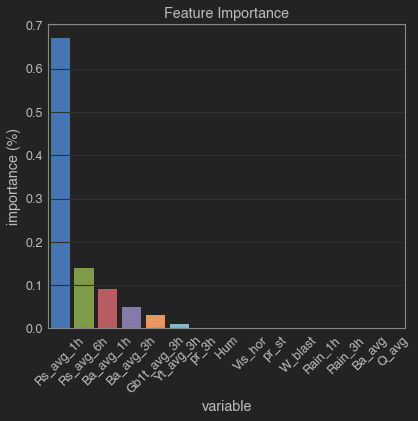

<Figure size 1080x1080 with 0 Axes>

In [33]:
# Feature importance of 15 variables
ax = sns.barplot(x="variable", y="importance (%)", orient= 'v', data=df_importance_var.iloc[:15,:])
for item in ax.get_xticklabels():
    item.set_rotation(45)
plt.title('Feature Importance')
plt.figure(figsize=(15,15))
